In [46]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [7]:
census = pd.read_csv('D:\\Desktop\\BI Learn\\Python Restaurant Location Recommendation\\census.csv')
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NBHD_ID          78 non-null     int64  
 1   NBHD_NAME        78 non-null     object 
 2   POPULATION_2010  78 non-null     float64
 3   AGE_LESS_18      78 non-null     float64
 4   AGE_18_TO_34     78 non-null     float64
 5   AGE_35_TO_65     78 non-null     float64
 6   AGE_65_PLUS      78 non-null     float64
 7   NUM_HOUSEHOLDS   78 non-null     float64
 8   FAMILIES         78 non-null     float64
 9   NUM_HHLD_100K+   48 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 6.2+ KB


In [9]:
denver = pd.read_csv('D:\\Desktop\\BI Learn\\Python Restaurant Location Recommendation\\denver.csv')
denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StoreNumber  78 non-null     object 
 1   Name         78 non-null     object 
 2   PhoneNumber  77 non-null     object 
 3   Street1      78 non-null     object 
 4   Street2      15 non-null     object 
 5   Street3      11 non-null     object 
 6   PostalCode   78 non-null     int64  
 7   Longitude    78 non-null     float64
 8   Latitude     78 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ KB


Missing data in fields like Phone number, St 2, and St 3 isn't relevant to the analysis and will be left unaddressed.

In [12]:
neighborhoods = gpd.read_file('D:\\Desktop\\BI Learn\\Python Restaurant Location Recommendation\\neighborhoods.shp')
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   NBHD_ID    78 non-null     int64   
 1   NBHD_NAME  78 non-null     object  
 2   geometry   78 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.0+ KB


In [13]:
# Create geometry column - denver

geometry = [Point(xy) for xy in zip(denver['Longitude'], denver['Latitude'])]
crs = {"init": "epsg:4326"}
geo_denver = gpd.GeoDataFrame(denver, crs=crs, geometry=geometry)
geo_denver.head()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude,geometry
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75,POINT (-105.01000 39.75000)
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75,POINT (-104.99000 39.75000)
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68,POINT (-104.97000 39.68000)
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76,POINT (-105.02000 39.76000)
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77,POINT (-105.05000 39.77000)


In [17]:
# Data transformation - census
census_nei=neighborhoods.merge(census,how='inner')
census_nei['NUM_HHLD_100K+'] = census_nei['NUM_HHLD_100K+'].fillna(0)
census_nei['18-35_per']=census_nei['AGE_18_TO_34']/census_nei['POPULATION_2010']
census_nei['affluent_households_per']=census_nei['NUM_HHLD_100K+']/census_nei['NUM_HOUSEHOLDS']
census_nei['target_audience_size']=census_nei['affluent_households_per']*census_nei['AGE_18_TO_34']

census_nei.head(10)

,NBHD_ID,NBHD_NAME,geometry,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+,18-35_per,affluent_households_per,target_audience_size
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",705.0,7.0,635.0,57.0,6.0,60.0,15.0,0.0,0.900709,0.000000,0.000000
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",3892.0,763.0,906.0,1742.0,481.0,1771.0,959.0,0.0,0.232785,0.000000,0.000000
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",4172.0,646.0,621.0,1913.0,992.0,2126.0,1162.0,0.0,0.148849,0.000000,0.000000
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",6905.0,1199.0,1589.0,3276.0,841.0,3307.0,1695.0,1739.0,0.230123,0.525854,835.582401
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0,0.369936,0.432987,1024.013373
5,59,Speer,"POLYGON ((-104.97325 39.71840, -104.97323 39.7...",10954.0,707.0,5361.0,3970.0,916.0,7304.0,1400.0,1682.0,0.489410,0.230285,1234.556681
6,13,Cherry Creek,"POLYGON ((-104.94070 39.71156, -104.94091 39.7...",5589.0,413.0,1314.0,2523.0,1339.0,3542.0,1194.0,1818.0,0.235105,0.513269,674.435912
7,22,Country Club,"POLYGON ((-104.96017 39.72561, -104.96015 39.7...",3001.0,672.0,414.0,1514.0,401.0,1289.0,822.0,0.0,0.137954,0.000000,0.000000
8,20,Congress Park,"POLYGON ((-104.94066 39.74013, -104.94066 39.7...",10235.0,1427.0,3614.0,4450.0,744.0,5724.0,1940.0,1680.0,0.353102,0.293501,1060.712788
9,14,City Park,"POLYGON ((-104.94062 39.75104, -104.94063 39.7...",2907.0,316.0,1207.0,1067.0,317.0,1645.0,462.0,0.0,0.415205,0.000000,0.000000


In [20]:
# Joining denver to neighborhood
denver_neighbors = neighborhoods.sjoin(geo_denver, how='left') 
denver_neighbors.dropna(subset=['Longitude'], inplace=True)

denver_neighbors.head()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:2195: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: +init=epsg:4326 +type=crs

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


,NBHD_ID,NBHD_NAME,geometry,index_right,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",0.0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204.0,-105.01,39.75
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",21.0,8971-94801,Alameda & Downing,303-733-0246,1209 East Alameda Ave,NaN,NaN,802092420.0,-104.97,39.71
6,13,Cherry Creek,"POLYGON ((-104.94070 39.71156, -104.94091 39.7...",23.0,253-136,2nd Ave and Filmore - Cherry Creek,(303) 388-7565,200 Fillmore Street,NaN,NaN,802065028.0,-104.95,39.72
6,13,Cherry Creek,"POLYGON ((-104.94070 39.71156, -104.94091 39.7...",52.0,74178-32999,Safeway-Denver #100,303-355-5486,3110 E 1st Ave,NaN,NaN,802065614.0,-104.95,39.72
6,13,Cherry Creek,"POLYGON ((-104.94070 39.71156, -104.94091 39.7...",60.0,10861-103209,Cherry Creek Mall - West.,303-320-7560,3000 1st Ave.,NaN,NaN,802065638.0,-104.95,39.72


# 2. Starbucks Locations in Denver

2.1. Out of 78 neighborhoods, 42 have no Starbucks stores, while 20 neighborhoods have multiple branches, with the CBD having up to 7. 
2.2. The neighborhoods with more stores are clustered around central business districts (CBD).


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8540\2361895738.py:11: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  neighborhoods.plot(column ='NBHD_NAME', color='whitesmoke', edgecolor='gray',


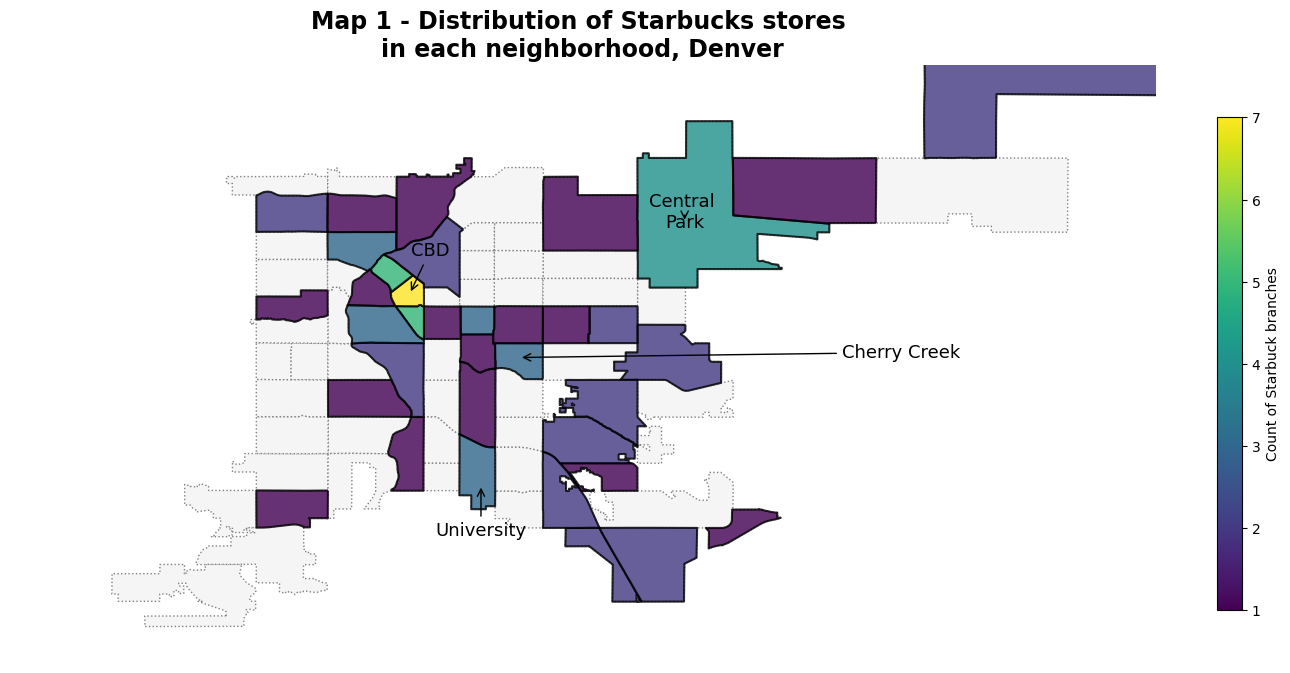

In [43]:
#First map: Distribution of Starbuck stores by neighborhoods
starbucks_density = denver_neighbors['NBHD_NAME'].value_counts().to_frame().reset_index()
starbucks_density.columns = ['NBHD_NAME', 'Count']
neighborhoods_density = neighborhoods.merge(starbucks_density, on='NBHD_NAME', how = "left")


 
fig, ax= plt.subplots(1,1, figsize=(13, 13))
plt.title('Map 1 - Distribution of Starbucks stores \nin each neighborhood, Denver',
          size=17, weight='heavy')
 
neighborhoods.plot(column ='NBHD_NAME', color='whitesmoke', edgecolor='gray', 
                       linestyle=':', ax=ax)

neighborhoods_density.plot(column='Count', cmap='viridis', edgecolor='black', linewidth=1.5, ax=ax,
                          alpha = 0.8)

# Add color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=neighborhoods_density['Count'].min(), vmax=neighborhoods_density['Count'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.02)
cbar.set_label('Count of Starbuck branches', size=10) 

def plot_annotate(name, xy, xytext):
    ax.annotate(text=name, xy=xy, xytext=xytext, size=13, arrowprops=dict(arrowstyle="->"), 
                horizontalalignment='center', color='black')
    
plot_annotate('CBD', (-104.993, 39.745), (-104.985, 39.76)) 
plot_annotate('Central \nPark', (-104.885, 39.773), (-104.885, 39.771)) 
plot_annotate('University', (-104.965, 39.67), (-104.965, 39.65)) 
plot_annotate('Cherry Creek', (-104.95, 39.72), (-104.8, 39.72)) 

 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.axis('off')
plt.xlim([-105.15,-104.7])
plt.ylim([39.6,39.835])
plt.tight_layout()

In [45]:
neighborhoods_density['Count'] = neighborhoods_density['Count'].fillna(0)
neighborhoods_density['Count'].value_counts().head(10)

0.0    42
1.0    16
2.0    11
3.0     5
5.0     2
7.0     1
4.0     1
Name: Count, dtype: int64

# 3. Demographic Analysis

**3.1. Young Adult (Age 18-34) Population & Proportion**
3.1.1. CBD & surrounding neighborhoods, and University areas (home University of Denver) have the highest proportion of young adults compared to the total population.
3.1.2. However, the North-West areas (Montbello & Gateway/Green Valey Ranch) also have a substantial absolute number of young adults, which is essential to consider for customer base size.

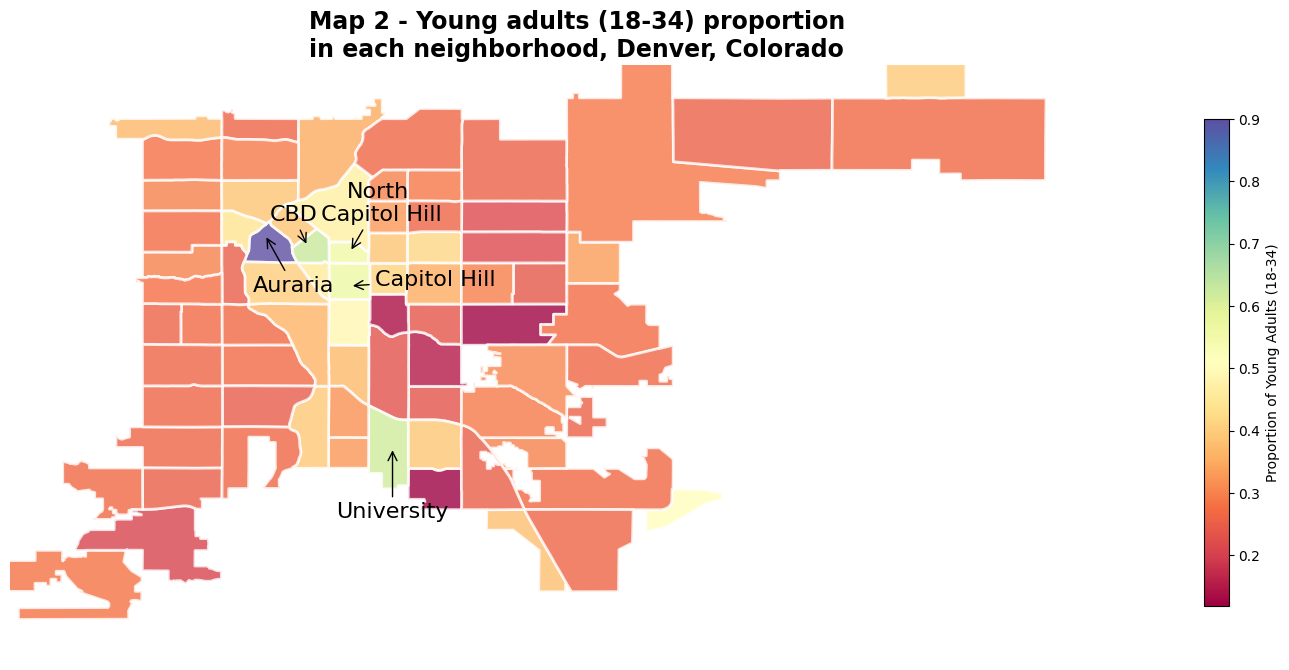

In [50]:
#Second map: Proportion of adolescents
fig, ax= plt.subplots(1,1, figsize=(13, 13))
 
plt.title('Map 2 - Young adults (18-34) proportion\nin each neighborhood, Denver, Colorado', size=17, weight='heavy')
census_nei.plot(column='18-35_per', cmap='Spectral',
                      edgecolor='white',linewidth=2, ax=ax, alpha=0.8)

# Add color bar
sm = plt.cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=census_nei['18-35_per'].min(), vmax=census_nei['18-35_per'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.02)
cbar.set_label('Proportion of Young Adults (18-34)', size=10)
 
def plot_annotate(name, xy, xytext, color='black'):
    ax.annotate(text=name, xy=xy, xytext=xytext, size=16, arrowprops=dict(arrowstyle="->", color=color), 
                horizontalalignment='center', color=color)
    
plot_annotate('Auraria', (-105.01, 39.75), (-105, 39.73))
plot_annotate('University', (-104.965, 39.675), (-104.965, 39.65))
plot_annotate('CBD', (-104.995, 39.746), (-105, 39.755))
plot_annotate('Capitol Hill', (-104.98, 39.732), (-104.95, 39.732))
plot_annotate('North\n Capitol Hill', (-104.98, 39.744), (-104.97, 39.755))
 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
 
plt.xlim([-105.1,-104.7])
plt.ylim([39.6,39.81])
plt.axis('off')
plt.tight_layout()

<AxesSubplot: xlabel='Neighborhood name', ylabel='18-35 years old proportion'>

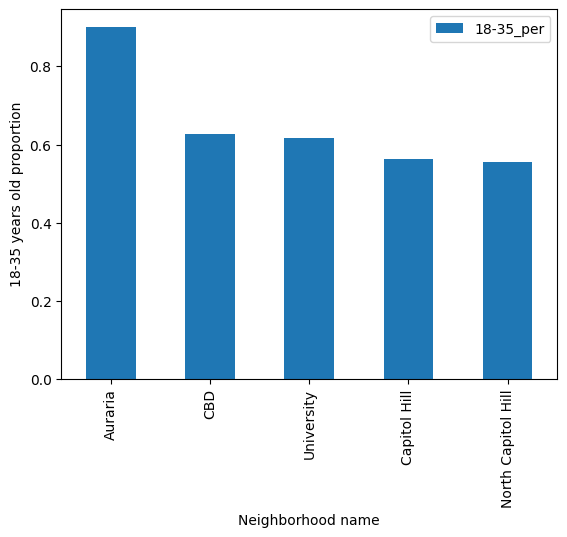

In [53]:
target_age_per=census_nei.sort_values('18-35_per', ascending=False).head(5)
target_age_per.plot(x='NBHD_NAME', y='18-35_per', kind='bar', ylabel='18-35 years old proportion', xlabel='Neighborhood name')

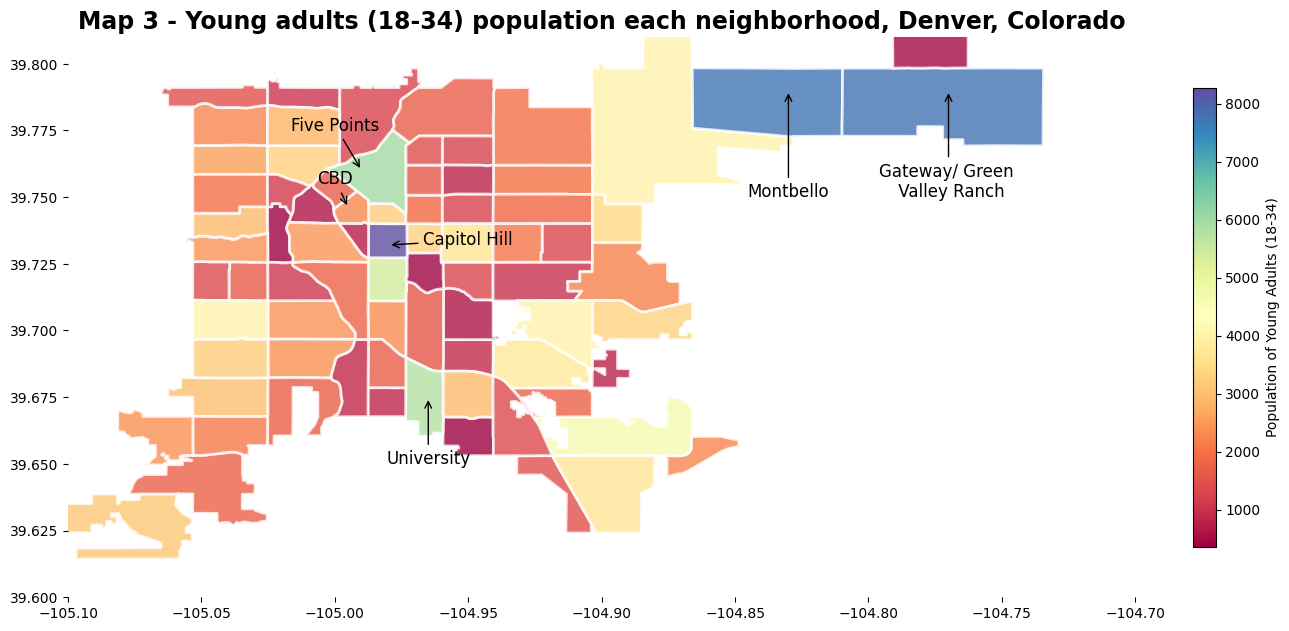

In [52]:
#Third map: Population of adolescents
fig, ax= plt.subplots(1,1, figsize=(13, 13))
 
plt.title('Map 3 - Young adults (18-34) population each neighborhood, Denver, Colorado', size=17, weight='heavy')
census_nei.plot(column='AGE_18_TO_34', cmap='Spectral',
                      edgecolor='white',linewidth=2, ax=ax, alpha=0.8)

# Add color bar
sm = plt.cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=census_nei['AGE_18_TO_34'].min(), vmax=census_nei['AGE_18_TO_34'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.02)
cbar.set_label('Population of Young Adults (18-34)', size=10)
 
def plot_annotate(name, xy, xytext, color='black'):
    ax.annotate(text=name, xy=xy, xytext=xytext, size=12, arrowprops=dict(arrowstyle="->", color=color), 
                horizontalalignment='center', color=color)
    
plot_annotate('University', (-104.965, 39.675), (-104.965, 39.65))
plot_annotate('CBD', (-104.995, 39.746), (-105, 39.755))
plot_annotate('Capitol Hill', (-104.98, 39.732), (-104.95, 39.732))
plot_annotate('Gateway/ Green \n Valley Ranch', (-104.77, 39.790), (-104.77, 39.750))
plot_annotate('Montbello', (-104.83, 39.790), (-104.83, 39.750))
plot_annotate('Five Points', (-104.99, 39.76), (-105.00, 39.775))
 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
 
plt.xlim([-105.1,-104.7])
plt.ylim([39.6,39.81])
plt.tight_layout()

<AxesSubplot: xlabel='Neighborhood name', ylabel='18-35 years old population'>

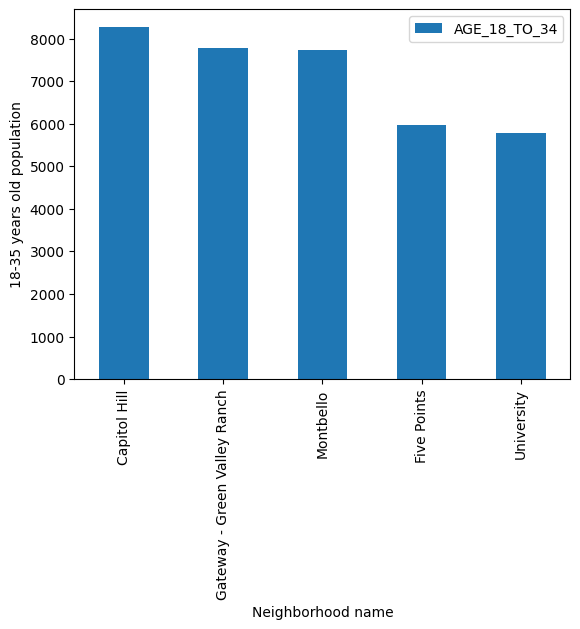

In [54]:
target_age_population=census_nei.sort_values('AGE_18_TO_34', ascending=False).head(5)
target_age_population.plot(x='NBHD_NAME', y='AGE_18_TO_34', kind='bar', ylabel='18-35 years old population', xlabel='Neighborhood name')

# 3.2. Affluent Household Proportion
3.2.1. The spread of higher-income individuals is more diverse, from the lower center to the upper east side.
3.2.2. Central Park stands out, boasting the highest proportion of affluent households.

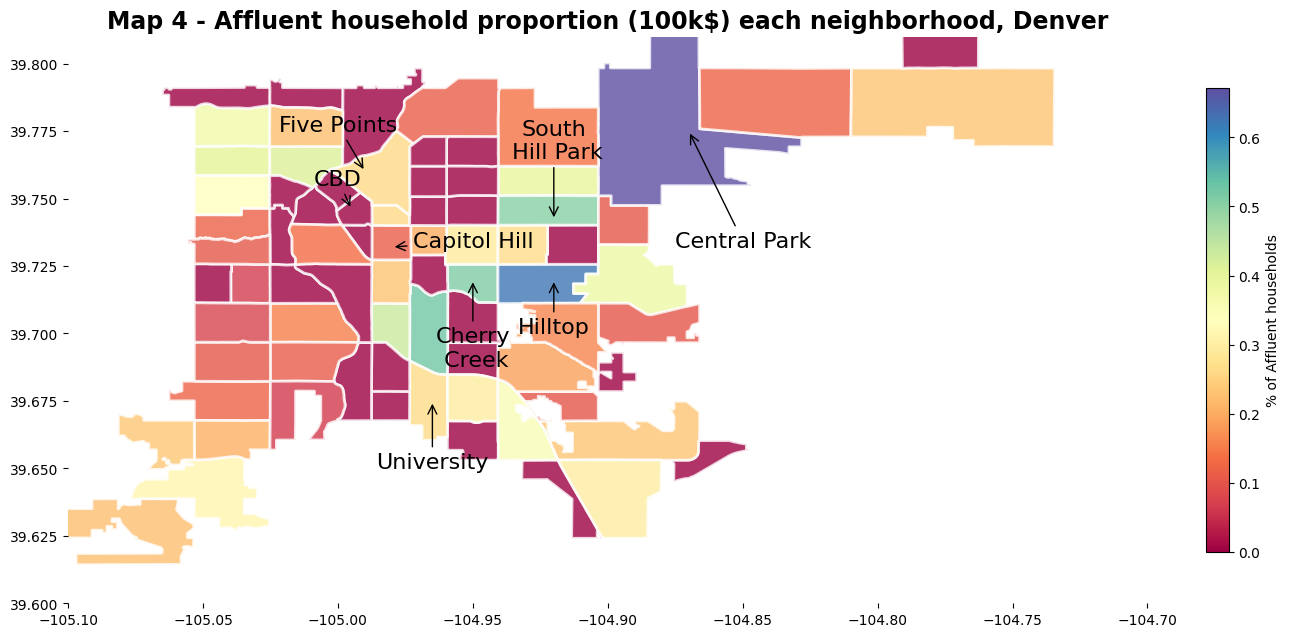

In [57]:
#Fourth map: Proportion of affluent households
fig, ax= plt.subplots(1,1, figsize=(13, 13))
 
plt.title('Map 4 - Affluent household proportion (100k$) each neighborhood, Denver', size=17, weight='heavy')
census_nei.plot(column='affluent_households_per', cmap='Spectral',
                      edgecolor='white',linewidth=2, ax=ax, alpha=0.8)

# Add color bar
sm = plt.cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=census_nei['affluent_households_per'].min(), vmax=census_nei['affluent_households_per'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.02)
cbar.set_label('% of Affluent households', size=10)
 
def plot_annotate(name, xy, xytext, color='black'):
    ax.annotate(text=name, xy=xy, xytext=xytext, size=16, arrowprops=dict(arrowstyle="->", color=color), 
                horizontalalignment='center', color=color)
    
plot_annotate('University', (-104.965, 39.675), (-104.965, 39.65))
plot_annotate('CBD', (-104.995, 39.746), (-105, 39.755))
plot_annotate('Capitol Hill', (-104.98, 39.732), (-104.95, 39.732))
plot_annotate('Five Points', (-104.99, 39.76), (-105.00, 39.775))
plot_annotate('Central Park', (-104.87, 39.775), (-104.85, 39.732))
plot_annotate('Hilltop', (-104.92, 39.720), (-104.92, 39.700))
plot_annotate('Cherry\n Creek', (-104.95, 39.720), (-104.95, 39.688))
plot_annotate('South\n Hill Park', (-104.92, 39.742), (-104.92, 39.765))

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
 
plt.xlim([-105.1,-104.7])
plt.ylim([39.6,39.81])
plt.tight_layout()

<AxesSubplot: xlabel='Neighborhood name', ylabel='affluent_households_per'>

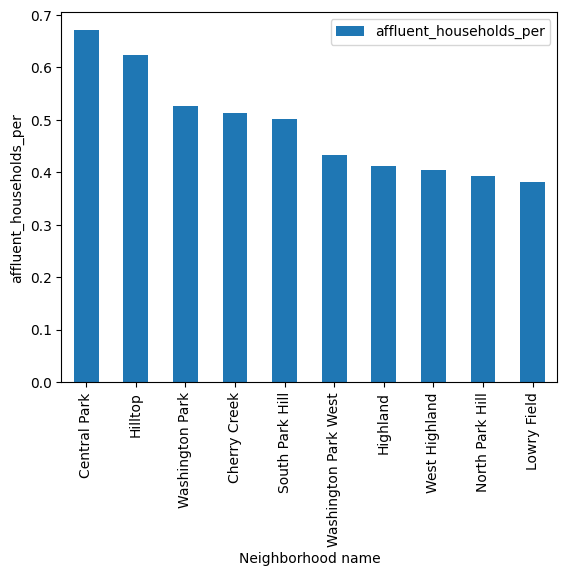

In [65]:
affluent_per=census_nei.sort_values('affluent_households_per', ascending=False).head(10)
affluent_per.plot(x='NBHD_NAME', y='affluent_households_per', kind='bar', ylabel='affluent_households_per', xlabel='Neighborhood name')

**# 4. Final Location Recommendation**
**4.1. Methodology**
Considering the varying demographics across neighborhoods with high populations of young adults (age 18-34) and affluent individuals, I'll calculate the market size using the following formula:

Market size for affluent young adults = Percentage of affluent households (%) * Population of young adults (number of people) 

This will represent the market size for affluent young adults inclined to spend money at coffee shops. The neighborhoods will be ranked from highest to lowest based on this market size.

**4.2. Findings**
4.2.1. **Central Park, Gateway/Green Valley Ranch, Five Points** and University are the top four neighborhoods with the highest number of affluent young adults (age 18-34), each having over 1,500 individuals, notably Central Park with almost 2,700 individuals.
4.2.2. Gateway/Green Valley Ranch and Five Points also present promising opportunities in terms of competition, as Starbucks does not have stores in these two neighborhoods.
4.2.3. This analysis does not yet incorporate factors such as competition from other chains besides Starbucks, operational costs (e.g., higher utility costs in inner-city areas), foot traffic, etc., which are also crucial for restaurant location analysis.

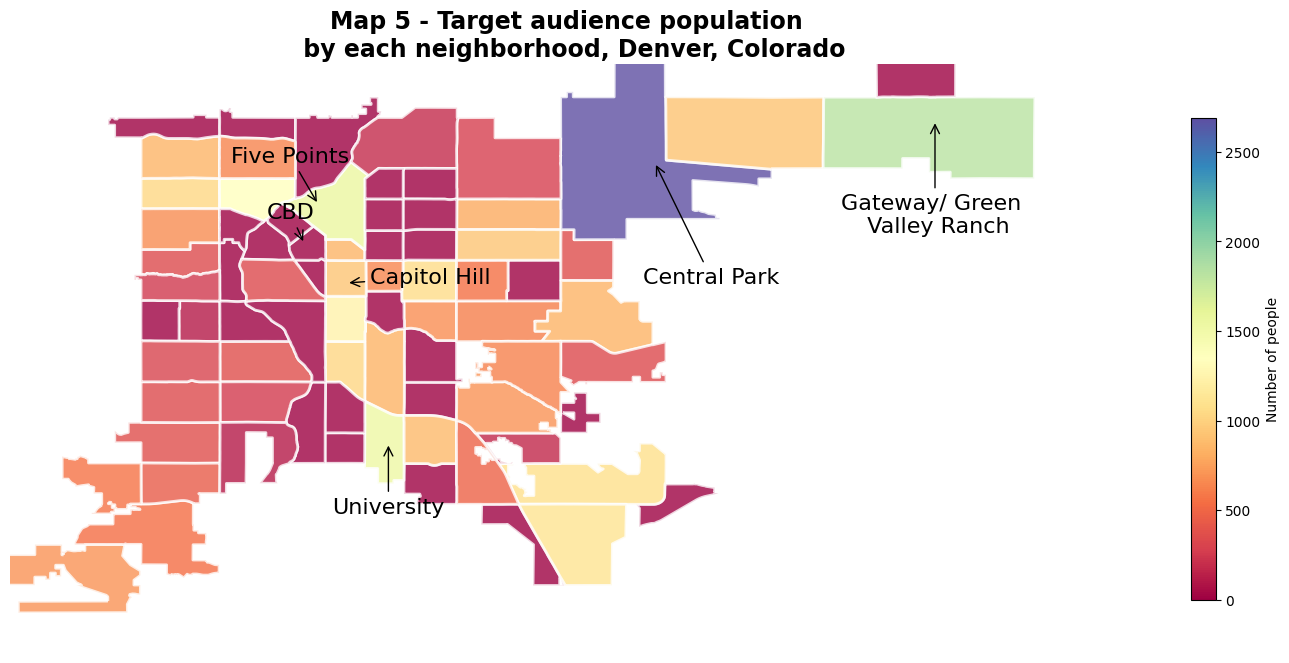

In [64]:
# Fifth Map: Market size by neighborhoods
fig, ax= plt.subplots(1,1, figsize=(13, 13))
 
plt.title('Map 5 - Target audience population \n by each neighborhood, Denver, Colorado', size=17, weight='heavy')
census_nei.plot(column='target_audience_size', cmap='Spectral',
                      edgecolor='white',linewidth=2, ax=ax, alpha=0.8)

# Add color bar
sm = plt.cm.ScalarMappable(cmap='Spectral', norm=plt.Normalize(vmin=census_nei['target_audience_size'].min(), vmax=census_nei['target_audience_size'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.02)
cbar.set_label('Number of people', size=10)
 
def plot_annotate(name, xy, xytext, color='black'):
    ax.annotate(text=name, xy=xy, xytext=xytext, size=16, arrowprops=dict(arrowstyle="->", color=color), 
                horizontalalignment='center', color=color)
    
plot_annotate('University', (-104.965, 39.675), (-104.965, 39.65))
plot_annotate('CBD', (-104.995, 39.746), (-105, 39.755))
plot_annotate('Capitol Hill', (-104.98, 39.732), (-104.95, 39.732))
plot_annotate('Gateway/ Green \n Valley Ranch', (-104.77, 39.790), (-104.77, 39.750))
plot_annotate('Five Points', (-104.99, 39.76), (-105.00, 39.775))
plot_annotate('Central Park', (-104.87, 39.775), (-104.85, 39.732))
 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
 
plt.xlim([-105.1,-104.7])
plt.ylim([39.6,39.81])
plt.axis('off')
plt.tight_layout()


<AxesSubplot: xlabel='Neighborhood name', ylabel='Target audience size (number of people)'>

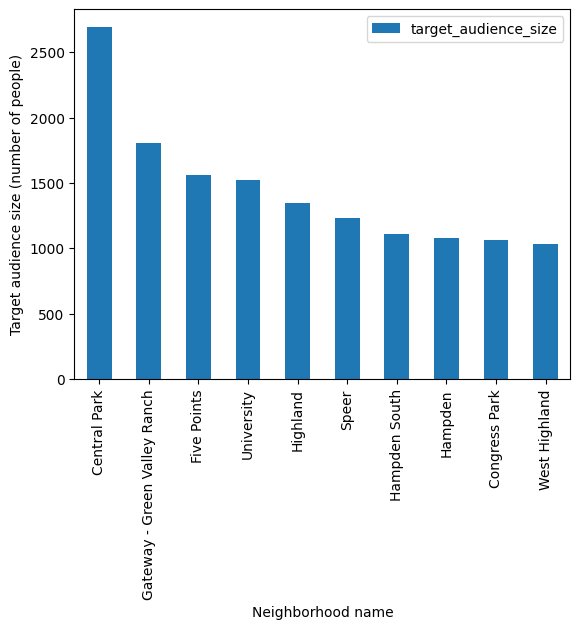

In [67]:
market_size=census_nei.sort_values('target_audience_size', ascending=False).head(10)
market_size.plot(x='NBHD_NAME', y='target_audience_size', kind='bar', ylabel='Target audience size (number of people)', xlabel='Neighborhood name')

In [72]:
census_nei.sort_values('target_audience_size', ascending=False).loc[:, ['NBHD_NAME', 'target_audience_size']].head(10)

,NBHD_NAME,target_audience_size
50,Central Park,2691.589443
53,Gateway - Green Valley Ranch,1808.568580
60,Five Points,1563.296909
23,University,1524.858739
20,Highland,1348.432825
5,Speer,1234.556681
38,Hampden South,1111.028855
36,Hampden,1078.841202
8,Congress Park,1060.712788
15,West Highland,1035.567434
